In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
from skimage.util import random_noise

In [105]:
# Importing the dataset
dog_breed_name = pd.read_csv('./data/labels.csv')
dog_breed_name.head()

# Find training files
images_train = os.listdir("./data/train")
# Find testing files
images_test = os.listdir("./data/test")

dog_breed_dict = {}
for i, breed in enumerate(dog_breed_name['breed'].unique()):
    dog_breed_dict[breed] = i

In [106]:
def resize_image(image, IMG_SIZE=224):
    image = cv2.imread(image, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    return image

# Image modifications for data augmentation

In [143]:
def vertical_flip_image(image:np.ndarray):
    flipped_image = cv2.flip(image, 1)
    return flipped_image

In [158]:
# Randomly rotates image between -5 to 5 degrees (except 0)
def small_angle_rotate_image(image:np.ndarray):
    angle = np.random.choice(np.concatenate((np.arange(-5, 0), np.arange(1, 5))))
    
    height, width = image.shape[0], image.shape[1]
    image_center = (width/2, height/2)
    
    r_matrix = cv2.getRotationMatrix2D(center=image_center, angle=angle, scale=1.0)
    rotated_image = cv2.warpAffine(src=image, M=r_matrix, dsize=(height,width), flags=cv2.INTER_LINEAR)
    return rotated_image, angle

In [159]:
def gaussian_blur_image(image:np.ndarray):
    std_dev = np.random.choice(np.arange(0.01, 0.2, 0.01))
    noisy_image = cv2.convertScaleAbs(random_noise(image, mode='gaussian', var=std_dev**2), alpha=(255.0))
    return noisy_image, std_dev

In [160]:
def salt_pepper_image(image:np.ndarray):
    noisy_image = cv2.convertScaleAbs(random_noise(image, mode='s&p', salt_vs_pepper=0.5), alpha=(255.0))
    return noisy_image

In [161]:
def speckle_image(image:np.ndarray):
    std_dev = np.random.choice(np.arange(0.01, 0.2, 0.01))
    noisy_image = cv2.convertScaleAbs(random_noise(image, mode='speckle', var=std_dev**2), alpha=(255.0))
    return noisy_image, std_dev

# Testing image modifications

84accc2dc9f5bb3ebee89fe1bf23639c
14cffe576239620f1733dfe487dbaa6f
cc93915e06bc55626a02af95006a48c2
6f9bac41b5be5ee6baecc9e7ef8f2c2a
64dd586a1d08937d20618233df2e5dbc
2c1b06c76751d8b9f9ff943cd693cfca
114524d11fe49af5be43897233a4f65e
efec2f66576df7aa036d77ad1fafc8bf
eecab13ff6ae86429d808115d161d455
30d54cbd3a88a8473ade8028cd1f2378


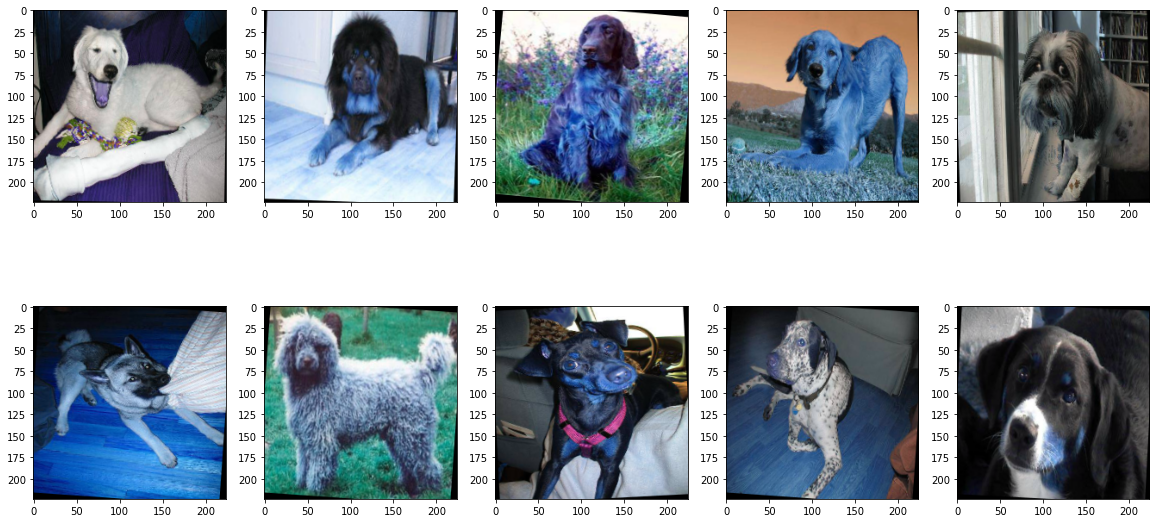

In [162]:
# Show the modified image
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    resized_image = resize_image('./data/train/' + images_train[i])
    print(images_train[i][:-4])
    image, angle = small_angle_rotate_image(resized_image)
    plt.imshow(image)
    
plt.show()

# Save modified images

In [148]:
# Save modified image
def save_modified_image(image:np.ndarray, filename:str, settype:str, modification:str):
    if settype != 'train' and settype != 'test':
        raise Exception("settype not recognized")   
    cv2.imwrite('./data/modified/'+settype+'/'+filename[:-4]+'_'+modification+'.jpg', image)     

In [149]:
def save_all_image_modifications(filename:str, settype:str, size:int=224):
    resized = resize_image('./data/' + settype + '/' + filename, size)
    save_modified_image(resized, filename, settype, str(size))
    cv2.imwrite('./data/'+settype+'_'+str(size)+'/'+filename, resized)
    
    flipped_resized = vertical_flip_image(resized)
    random_rotated_resized, angle_rotation = small_angle_rotate_image(resized)
    gaussian_blur_resized, gaussian_std_dev = gaussian_blur_image(resized)
    salt_pepper_resized = salt_pepper_image(resized)
    speckled_resized, speckled_std_dev = speckle_image(resized)
    
    save_modified_image(flipped_resized, filename, settype, str(size) + 'flipped')
    save_modified_image(random_rotated_resized, filename, settype, str(size) + 'rotated_' + str(angle_rotation))
    save_modified_image(gaussian_blur_resized, filename, settype, str(size) + 'gaussian_' + str(gaussian_std_dev))
    save_modified_image(salt_pepper_resized, filename, settype, str(size) + 'saltpepper')
    save_modified_image(speckled_resized, filename, settype, str(size) + 'speckled_'+ str(speckled_std_dev))

In [164]:
for i in range(len(images_train)):
    save_all_image_modifications(images_train[i], 'train', 224)

for i in range(len(images_test)):
    save_all_image_modifications(images_test[i], 'test', 224)